In [4]:
import pandas as pd

df = pd.read_csv('/Users/daniyalrosli/textfilter/sms_data.csv')




In [5]:
#data info

df.info()
print(df.head())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4  

In [12]:
#data preprocessing

df.isnull().sum()

df.dropna(inplace=True)

df.isnull().sum()

# Remove unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Rename columns for better understanding
df.rename(columns={'v1': 'Label', 'v2': 'Message'}, inplace=True)

# Convert labels to binary values
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())



   Label                                            Message  \
0      0                                \Wen u miss someone   
1      0  Edison has rightly said, \A fool can ask more ...   
2      0      I just lov this line: \Hurt me with the truth   
3      0  \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...   
4      0  When I was born, GOD said, \Oh No! Another IDI...   

                                     cleaned_message  
0                                 wen u miss someone  
1  edison has rightly said a fool can ask more qu...  
2        i just lov this line hurt me with the truth  
3  hey babe far 2 spunout 2 spk at da mo dead 2 d...  
4  when i was born god said oh no another idiot w...  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            6 non-null      int64 
 1   Message          6 non-null      object
 2   cleaned_message  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


       Label
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Label
0    6
Name: count, dtype: int64


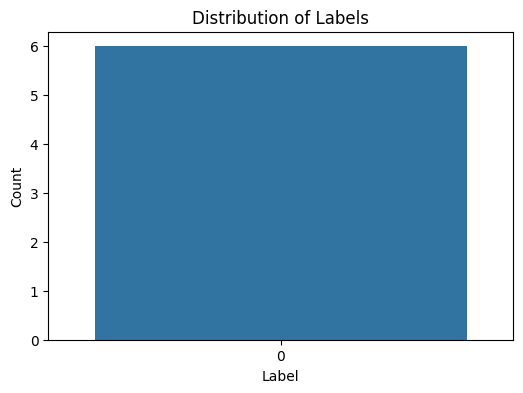

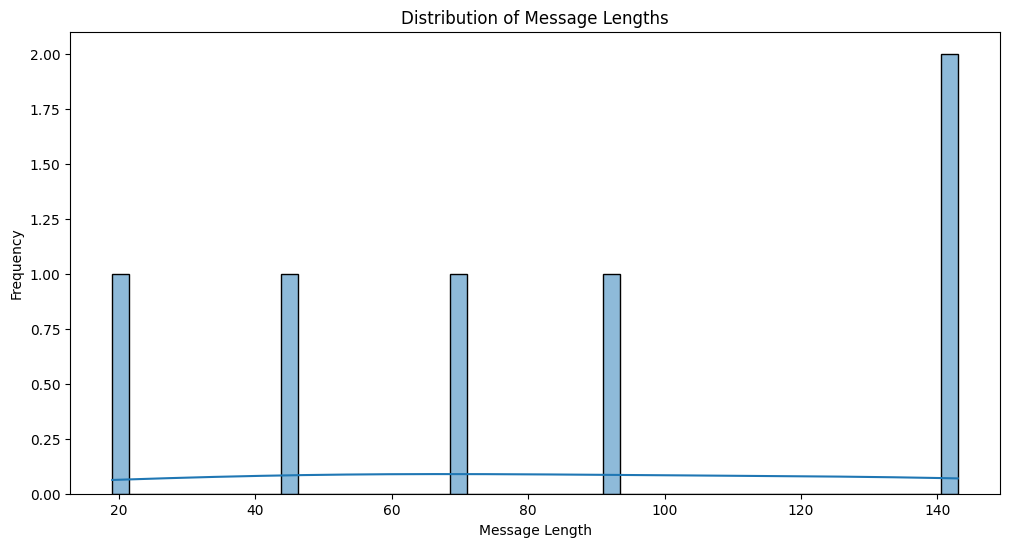

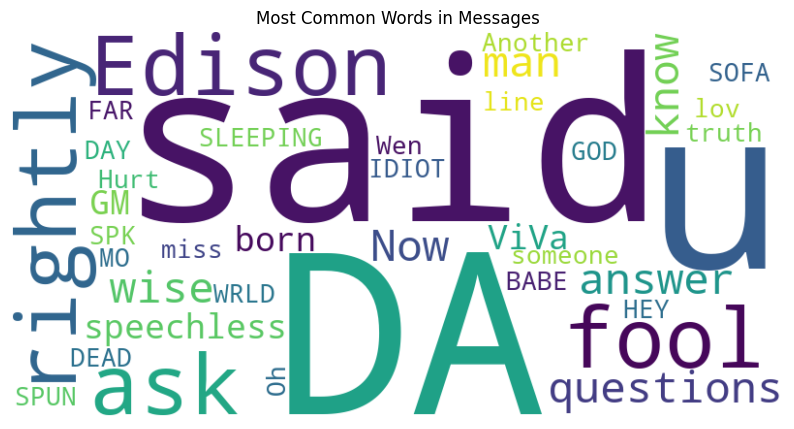

In [14]:
import seaborn as sns
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Basic statistics
print(df.describe())
print(df['Label'].value_counts())

# Visualize the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Analyze the length of the messages
df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Message_Length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Visualize the most common words in the messages
all_words = ' '.join(df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Messages')
plt.axis('off')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string

# Extract features from the text data
df['Num_Words'] = df['Message'].apply(lambda x: len(x.split()))
df['Num_Punctuations'] = df['Message'].apply(lambda x: sum([1 for char in x if char in string.punctuation]))

# Convert text data into numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['Message']).toarray()

# Combine all features into a single dataframe
X = pd.concat([df[['Message_Length', 'Num_Words', 'Num_Punctuations']], pd.DataFrame(X_tfidf)], axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(4, 65) (2, 65)


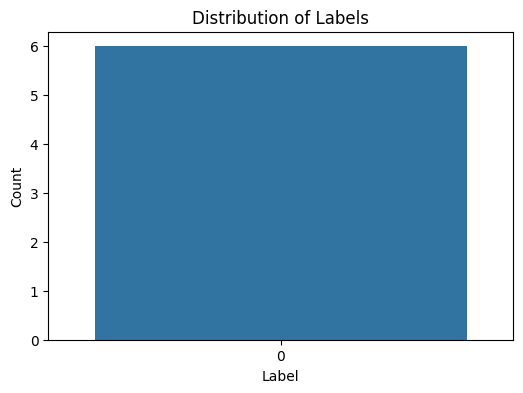

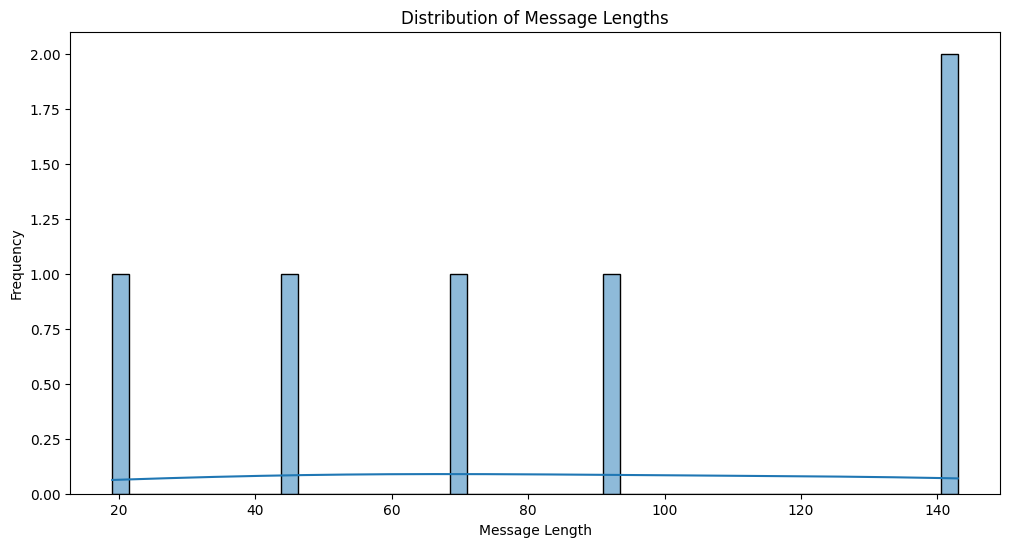

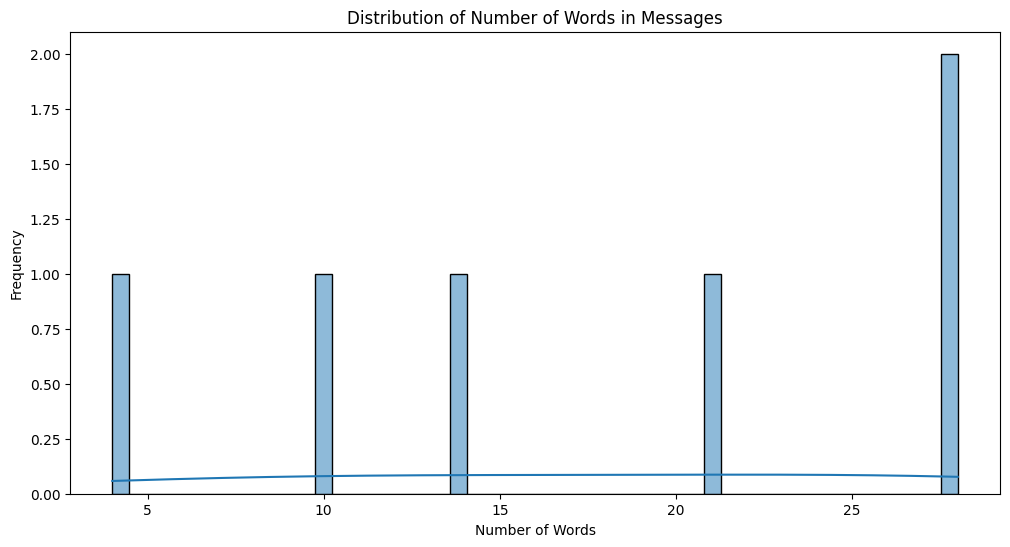

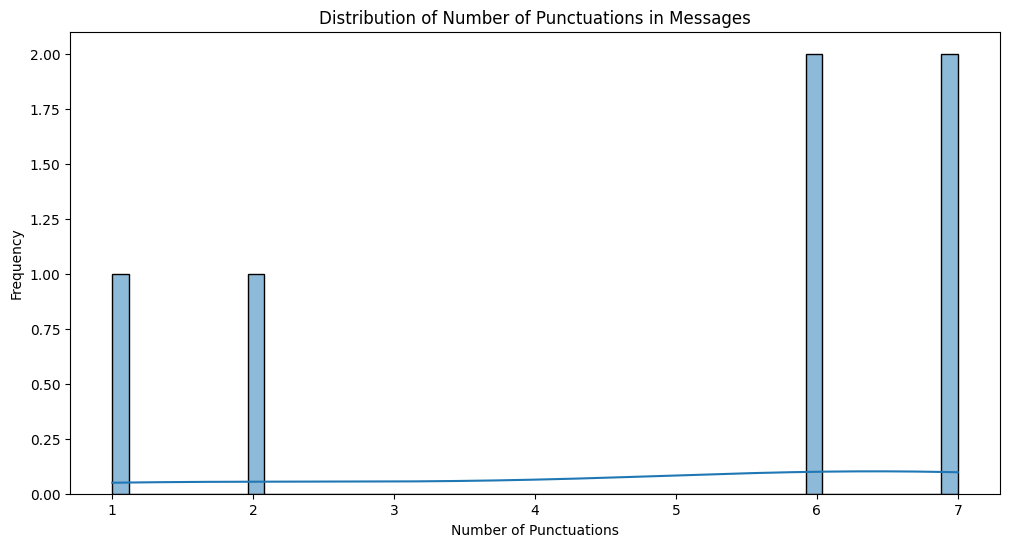

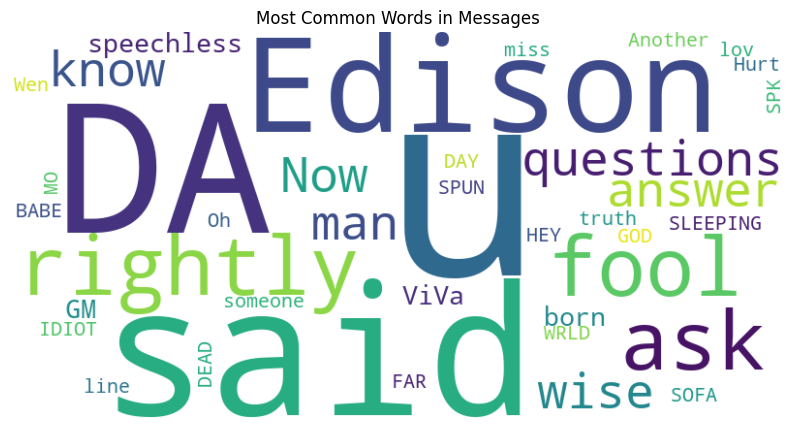

In [12]:
import seaborn as sns
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Visualize the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Analyze the length of the messages
plt.figure(figsize=(12, 6))
sns.histplot(df['Message_Length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of words in the messages
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Words'], bins=50, kde=True)
plt.title('Distribution of Number of Words in Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of punctuations in the messages
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Punctuations'], bins=50, kde=True)
plt.title('Distribution of Number of Punctuations in Messages')
plt.xlabel('Number of Punctuations')
plt.ylabel('Frequency')
plt.show()

# Visualize the most common words in the messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Messages')
plt.axis('off')
plt.show()

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Train and evaluate model

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[2]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [19]:
#test the model

def predict_spam(text):
    # Preprocess the text
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    
    # Extract features from the text
    message_length = len(text)
    num_words = len(text.split())
    num_punctuations = sum([1 for char in text if char in string.punctuation])
    text_tfidf = tfidf.transform([text]).toarray()
    
    # Combine all features into a single dataframe
    X = pd.concat([pd.DataFrame([[message_length, num_words, num_punctuations]]), pd.DataFrame(text_tfidf)], axis=1)
    X.columns = X.columns.astype(str)
    
    # Make prediction
    prediction = nb_model.predict(X)
    
    return 'spam' if prediction[0] == 1 else 'ham'